In [1]:
import numpy as np
from sparrow.tools.path import get_workspace_path
from sklearn import linear_model
import matplotlib.pyplot  as plt
from sparrow.tools.metrics import output_metrics
#filename=sys.argv[1]
workspace_path=get_workspace_path("source/sparrow/cookbook")
X=[]
Y=[]
with open(workspace_path+"dataset/csv/regressor.csv",'r') as f:
    for line in f.readlines():
        x,y=[float(i) for i in line.split(",")]
        X.append(x)
        Y.append(y)
X,Y

([1.0,
  3.0,
  1.0,
  7.0,
  8.0,
  9.0,
  11.0,
  1.0,
  22.0,
  10.0,
  29.0,
  10.0,
  2.0,
  5.0,
  9.0,
  1.0,
  2.0,
  3.0,
  9.0,
  17.0,
  16.0,
  1.0,
  99.0,
  2.0,
  7.0,
  15.0,
  32.0,
  60.0,
  2.0,
  7.0,
  19.0,
  10.0,
  17.0,
  33.0,
  65.0,
  120.0,
  249.0,
  487.0,
  1.0,
  2.0,
  8.0,
  10.0,
  1.0],
 [2.0,
  6.0,
  2.6,
  10.9,
  20.0,
  19.0,
  22.0,
  2.0,
  22.0,
  20.0,
  50.0,
  23.0,
  4.0,
  11.0,
  18.0,
  3.0,
  5.0,
  7.0,
  17.0,
  33.0,
  31.0,
  10.0,
  180.0,
  5.0,
  15.0,
  32.0,
  60.0,
  110.0,
  5.0,
  10.0,
  37.0,
  17.0,
  33.0,
  65.0,
  120.0,
  249.0,
  487.0,
  1000.0,
  2.0,
  5.0,
  19.0,
  28.0,
  1.2])

In [2]:
length=len(X)
num_training=int(0.8*length)
num_test=length-num_training
num_training,num_test

(34, 9)

In [3]:
X_train=np.array(X[:num_training]).reshape((num_training,1))
Y_train=np.array(Y[:num_training])
X[:num_training],X_train,Y_train

([1.0,
  3.0,
  1.0,
  7.0,
  8.0,
  9.0,
  11.0,
  1.0,
  22.0,
  10.0,
  29.0,
  10.0,
  2.0,
  5.0,
  9.0,
  1.0,
  2.0,
  3.0,
  9.0,
  17.0,
  16.0,
  1.0,
  99.0,
  2.0,
  7.0,
  15.0,
  32.0,
  60.0,
  2.0,
  7.0,
  19.0,
  10.0,
  17.0,
  33.0],
 array([[ 1.],
        [ 3.],
        [ 1.],
        [ 7.],
        [ 8.],
        [ 9.],
        [11.],
        [ 1.],
        [22.],
        [10.],
        [29.],
        [10.],
        [ 2.],
        [ 5.],
        [ 9.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 9.],
        [17.],
        [16.],
        [ 1.],
        [99.],
        [ 2.],
        [ 7.],
        [15.],
        [32.],
        [60.],
        [ 2.],
        [ 7.],
        [19.],
        [10.],
        [17.],
        [33.]]),
 array([  2. ,   6. ,   2.6,  10.9,  20. ,  19. ,  22. ,   2. ,  22. ,
         20. ,  50. ,  23. ,   4. ,  11. ,  18. ,   3. ,   5. ,   7. ,
         17. ,  33. ,  31. ,  10. , 180. ,   5. ,  15. ,  32. ,  60. ,
        110. ,   5. ,

In [4]:
X_test=np.array(X[num_training:]).reshape((num_test,1))
Y_test=np.array(Y[num_training:])

X[num_training:],X_test,Y_test

([65.0, 120.0, 249.0, 487.0, 1.0, 2.0, 8.0, 10.0, 1.0],
 array([[ 65.],
        [120.],
        [249.],
        [487.],
        [  1.],
        [  2.],
        [  8.],
        [ 10.],
        [  1.]]),
 array([ 120. ,  249. ,  487. , 1000. ,    2. ,    5. ,   19. ,   28. ,
           1.2]))

In [5]:
linear_regressor=linear_model.LinearRegression()
linear_regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

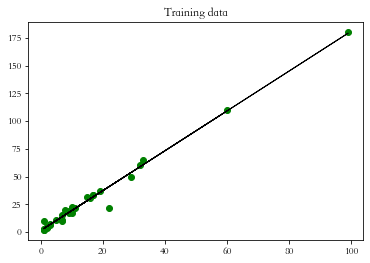

In [6]:
Y_train_pred=linear_regressor.predict(X_train)
plt.figure()
#散点
plt.scatter(X_train,Y_train,color="green")
#画线
plt.plot(X_train,Y_train_pred,color="black",linewidth="1")
plt.title("Training data")
plt.show()


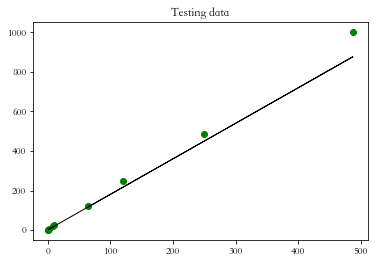

In [7]:
Y_test_pred=linear_regressor.predict(X_test)
plt.figure()
#散点
plt.scatter(X_test,Y_test,color="green")
#画线
plt.plot(X_test,Y_test_pred,color="black",linewidth="1")
plt.title("Testing data")
plt.show()

In [8]:
output_metrics(Y_test,Y_test_pred)

平均绝对误差 Mean absolute error= 23.6
均方误差(最低） Mean squared error= 2011.2
中位数绝对误差 Median absolute error= 3.29
解释方差分(最高 1.0) explained variance score= 0.99
R方得分（最高1.0，可能为负) R2 score 0.98


平均绝对误差 Mean absolute error= 23.88
均方误差(最低） Mean squared error= 2057.25
中位数绝对误差 Median absolute error= 3.27
解释方差分(最高 1.0) explained variance score= 0.98
R方得分（最高1.0，可能为负) R2 score 0.98


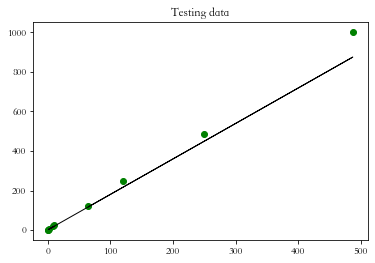

In [9]:
ridge_regressor=linear_model.Ridge(alpha=20,fit_intercept=True,max_iter=1000000)
ridge_regressor.fit(X_train,Y_train)
y_test_pred_ridge=ridge_regressor.predict(X_test)

output_metrics(Y_test,y_test_pred_ridge)

plt.figure()
#散点
plt.scatter(X_test,Y_test,color="green")
#画线
plt.plot(X_test,y_test_pred_ridge,color="black",linewidth="1")
plt.title("Testing data")
plt.show()
